In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
data = iris['data'][:,:3] # Take 3 features so we can visualize
data -= np.mean(data, axis=0)
target = iris['target']

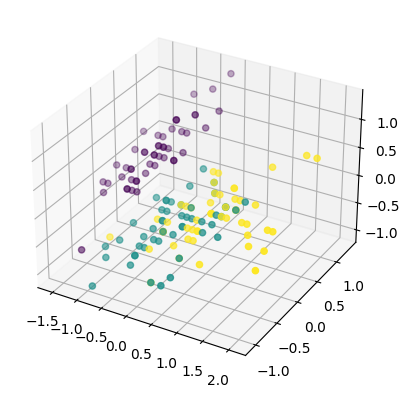

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,1], c=target)

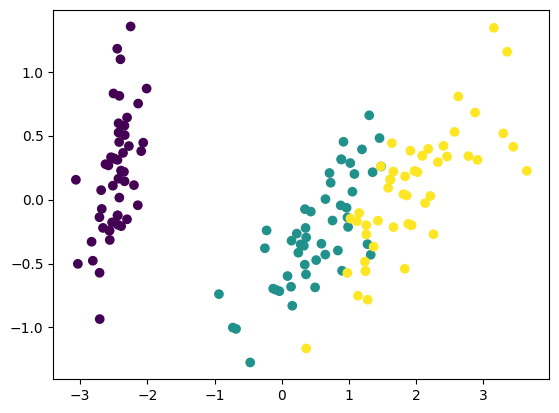

In [5]:
from sklearn.decomposition import PCA
sk_pca = PCA(n_components=2).fit_transform(data)
plt.scatter(sk_pca[:,0], sk_pca[:,1], c=target)

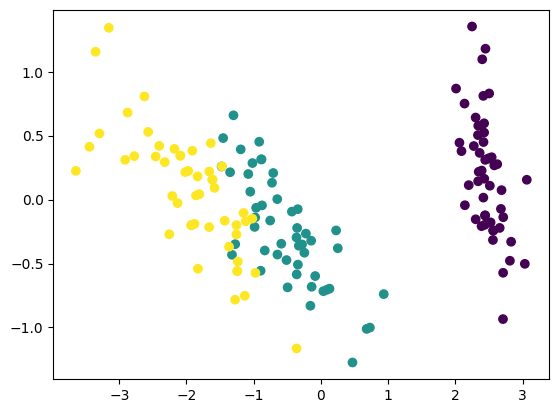

In [10]:
eig_val, eig_vec = np.linalg.eig(data.T.dot(data))
d = eig_vec[:,np.argsort(eig_val)[-2:][::-1]]
eig_pca = data.dot(d)
plt.scatter(eig_pca[:,0], eig_pca[:,1], c=target)

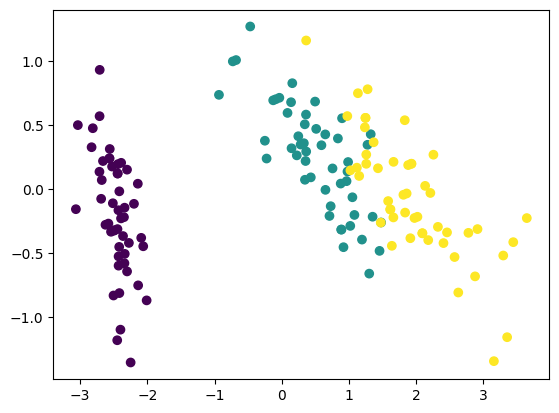

In [12]:
U, S, Vt = np.linalg.svd(data, full_matrices=False)
svd_pca = (U * S)[:,:2]
plt.scatter(svd_pca[:,0], svd_pca[:,1], c=target)

We can see that all 3 produces the same output (with sign flips). sklearn fixes this by enforcing that the first value in each eigenvector is positive, using the function `svd_flip()`.